In [10]:
# 에러 값에 대한 여러가지 성능 평가 기법

from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("MAE: ", mean_absolute_error(y_true, y_pred)) #MAE    # 에러가 선형적으로 벌생할 때 

from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("MSE: ", mean_squared_error(y_true, y_pred)) #MSE: squared=True(Default값) 실제 값과 예측 값의 차이를 제곱해 평균화

from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("RMSE: ", mean_squared_error(y_true, y_pred, squared=False)) #RMSE: squared=False  MSE에 루트를 씌운 형태

from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("R-squared: ", r2_score(y_true, y_pred)) #R-Squared   # 결정계수



MAE:  0.5
MSE:  0.375
RMSE:  0.6123724356957945
R-squared:  0.9486081370449679


# 다중 선형회귀

In [11]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"        # 가져오고 싶은 url 링크
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df      # 데이터 전처리가 되지 않아있으므로 이대로 데이터를 분석하면 값이 이상해짐. 

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [12]:
#hstack 수평으로 값을 stack
X = np.hstack([raw_df.values[0::2, ], raw_df.values[0::2, :2]]) #독립변수 13개  law 데이터가 다음행 1열까지 위치 하고 있으므로 제대로 값을 보기위해 열을 13개로 만듦.    # 독립변수는 스스로가 정하고 여기서의 독립변수는 상황(국가가 다름)등에 따라서 다름.
y = raw_df.values[1::2, 2] #종속변수: 본인 소유 주택가격(중앙값)
y = y.reshape(-1,1)
#변수명 지정
feature_names = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT'])
X_data = pd.DataFrame(data=X,columns=feature_names) # 데이터 프레임 생성
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,0.00632,18.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,0.02731,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,0.02729,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,0.03237,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,0.06905,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,0.06263,0.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,0.04527,0.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,0.06076,0.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,0.10959,0.0


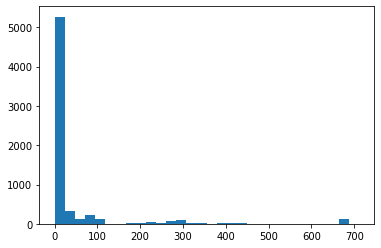

In [13]:
import matplotlib.pyplot as plt 
plt.hist(X.flatten(), bins=30); #독립변수 데이터분포 살펴보기

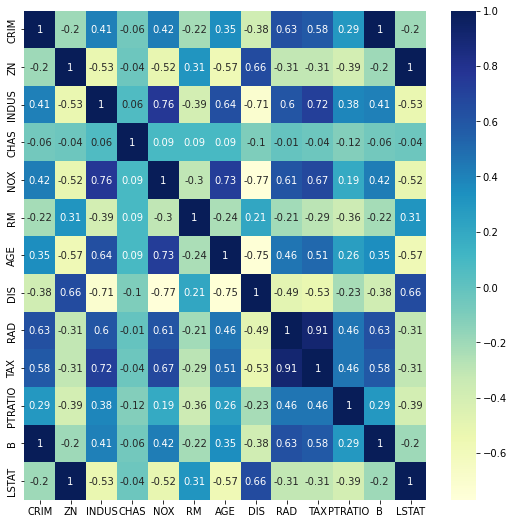

In [14]:
import seaborn as sns 

raw_data = pd.DataFrame(data=np.hstack([X,y]), columns=np.append(feature_names, 'MEDV'))
#correlation_matrix 판다스에서 기본 제공함.
correlation_matrix = X_data.corr().round(2)
plt.subplots(figsize=(9,9))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler      # 정규화를 통한 높이를 맞추는 함수를 임포트함.

minmax_scale = MinMaxScaler(feature_range=(0,5)).fit(X) #min:0, max:5
X_scaled = minmax_scale.transform(X) #feature scaling을 적용한 독립변수
X_scaled  

# X_scaled에 관한 수식 pdf에서 확인하기 

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, ...,
        1.43617021e+00, 0.00000000e+00, 9.00000000e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, ...,
        2.76595745e+00, 1.17961270e-03, 0.00000000e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, ...,
        2.76595745e+00, 1.17848872e-03, 0.00000000e+00],
       ...,
       [3.05946237e-03, 0.00000000e+00, 2.10227273e+00, ...,
        4.46808511e+00, 3.05946237e-03, 0.00000000e+00],
       [5.80364950e-03, 0.00000000e+00, 2.10227273e+00, ...,
        4.46808511e+00, 5.80364950e-03, 0.00000000e+00],
       [2.30920846e-03, 0.00000000e+00, 2.10227273e+00, ...,
        4.46808511e+00, 2.30920846e-03, 0.00000000e+00]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 13), (102, 13), (404, 1), (102, 1))

In [17]:
from sklearn.linear_model import LinearRegression       # 선형회귀를 위한 import        선형회귀 OLS:Ordinary Least Square

ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train) #학습데이터를 통하여 선형모델 생성

print('Coefficients: ', ols_reg.coef_)
print('Intercept: ', ols_reg.intercept_)

Coefficients:  [[-1.76963574  0.55084331 -0.46720896  0.61478934 -2.1447592   5.56926963
  -0.77317132 -3.55783769  1.22037534 -1.28449715 -1.69700929 -1.76963574
   0.55084331]]
Intercept:  [25.0059217]
